In [1]:
import pandas as pd
import json

In [19]:
# Importacion de Plotly como libreria de DataViz
import plotly.express as px

In [2]:
import os

# Obtiene la ubicación completa del archivo del notebook
notebook_path = os.path.realpath('__file__')

# Obtiene la ruta absoluta de la carpeta "Coderhouser-DS-TP0002" sin importar donde te encuentres
path_base = os.path.abspath(os.path.join(notebook_path, "..", "..", "..", "..", "Coderhouser-DS-TP0002"))

print("Path base':", path_base)

Path base': C:\develoment\Coderhouser-DS-TP0002


#### Leyendo datos:

In [3]:
# Importamos nuestro dataset por equipo y partida 
data = pd.read_csv( path_base + r"\data\procesed\gameplay_by_team.csv")

In [4]:
# Reemplazar los valores de la columna "Wins"
data['WinTags'] = data['Wins'].replace({0: 'Loss', 1: 'Win'})

# Crear un mapeo de colores
color_map = {'Win': 'yellow', 'Loss': 'gray'}

### Feature Engineering:
importamos nuestros set de Features procesados

In [5]:
f = open(path_base + r"\\models\features.json")
featuresDicc = json.load(f)
f.close()

In [10]:
for feature in featuresDicc["grupos"]:
    print(feature['nombre'])

Conjunto de Características de Visión
Conjunto de Características de Rendimiento en Combate
Conjunto de Características de Desarrollo y Experiencia
Conjunto de Características de Combate Temprano
Conjunto de Características Económicas
Conjunto de Características de Desempeño en Dragones y Heralds


In [11]:
data = data[featuresDicc["grupos"][4]['variables']+["Wins"]]

### Separación de Datos:
- se dividio en un 80% de los datos para entrenamiento y un 20% para prueba.

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Wins'])  # X serán las características, excluyendo la columna objetivo (Wins)
y = data['Wins']  # y será la variable objetivo (Wins)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Entrenamiento de un Modelo de Regresion Lineal:
- Se carga la libreria **sklearn** con el modelo **LinearRegression** y se procede a realizar su entrenamiento

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


### Evaluación del Modelo:
- Se evalúa el modelo con el conjunto de prueba utilizando métricas apropiadas.

In [21]:

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.18735730073374718
R-squared: 0.2505366735328518


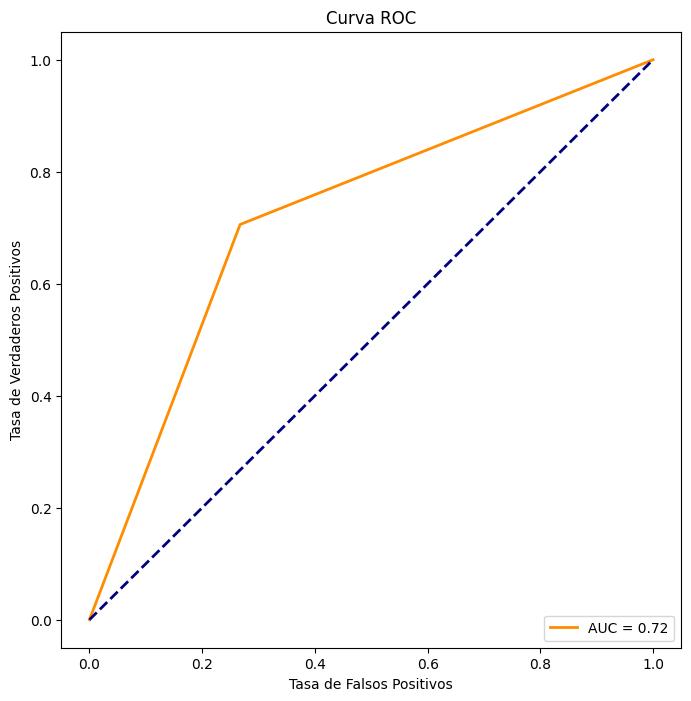

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Convertir predicciones en clasificación binaria usando un umbral
threshold = 0.5
binary_predictions = np.where(y_pred >= threshold, 1, 0)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, binary_predictions)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()